In [ ]:
import tensorflow as tf
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16

In [ ]:
file_url = 'https://github.com/PacktWorkshops/The-Deep-Learning-Workshop/raw/master/Chapter03/Datasets/Activity3.02/fruits360.zip'
zip_dir = tf.keras.utils.get_file('fruits360.zip', origin=file_url, extract=True)

82223104/82220233 [==============================] - 1s 0us/step


In [ ]:
path = pathlib.Path(zip_dir).parent / 'fruits360_filtered'
train_dir = path / 'Training'
validation_dir = path / 'Test'

In [ ]:
total_train = 11398
total_val = 4752

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255, 
                                           rotation_range=40, 
                                           width_shift_range=0.1, 
                                           height_shift_range=0.1, 
                                           shear_range=0.2, 
                                           zoom_range=0.2, 
                                           horizontal_flip=True, 
                                           fill_mode='nearest')

In [ ]:
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size=16
img_height = 100
img_width = 100
channel = 3

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           target_size=(img_height, img_width))

Found 11398 images belonging to 120 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(img_height, img_width))

Found 4752 images belonging to 120 classes.


In [ ]:
np.random.seed(8)
tf.random.set_seed(8)

In [ ]:
base_model = VGG16(input_shape=(img_height, img_width, channel), weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
base_model.trainable =  False

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [ ]:
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(120, activation='softmax')
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              4609000   
_________________________________________________________________
dense_1 (Dense)              (None, 120)               120120    
Total params: 19,443,808
Trainable params: 4,729,120
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
712/712 [==============================] - 91s 88ms/step - loss: 2.0379 - accuracy: 0.5008 - val_loss: 1.1960 - val_accuracy: 0.6574
Epoch 2/10
712/712 [==============================] - 61s 86ms/step - loss: 0.6566 - accuracy: 0.8065 - val_loss: 0.5812 - val_accuracy: 0.8415
Epoch 3/10
712/712 [==============================] - 60s 85ms/step - loss: 0.4259 - accuracy: 0.8732 - val_loss: 0.5224 - val_accuracy: 0.8569
Epoch 4/10
712/712 [==============================] - 60s 85ms/step - loss: 0.3468 - accuracy: 0.8894 - val_loss: 0.4913 - val_accuracy: 0.8460
Epoch 5/10
712/712 [==============================] - 62s 86ms/step - loss: 0.2872 - accuracy: 0.9063 - val_loss: 0.4637 - val_accuracy: 0.8592
Epoch 6/10
712/712 [==============================] - 61s 86ms/step - loss: 0.2647 - accuracy: 0.9135 - val_loss: 0.3479 - val_accuracy: 0.8933
Epoch 7/10
712/712 [==============================] - 61s 86ms/step - loss: 0.2382 - accuracy: 0.9255 - val_loss: 0.4617 - val_accuracy:

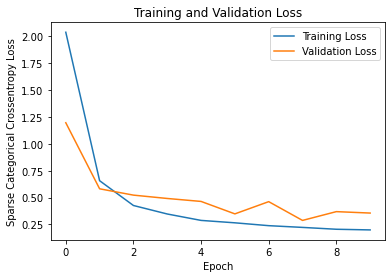

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Sparse Categorical Crossentropy Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

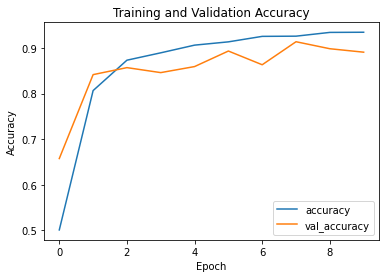

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
# plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()